<a href="https://colab.research.google.com/github/fatemafaria142/English-Question-Answering-with-AdversarialQA-Dataset/blob/main/English_Question_Answering_using_T5.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import nltk
import json
import csv
import io
from nltk.util import ngrams

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


# **AdversarialQA**
* Datasets produced in Beat the AI: Investigating Adversarial Human Annotation for Reading Comprehension
* Dataset Link: https://adversarialqa.github.io/

In [3]:
# Read the JSON file
with open('/content/drive/MyDrive/Adversarial_QA_Dataset/train.json', 'r') as file:
    data = json.load(file)
print(data)

IOPub data rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_data_rate_limit`.

Current values:
NotebookApp.iopub_data_rate_limit=1000000.0 (bytes/sec)
NotebookApp.rate_limit_window=3.0 (secs)



In [4]:
flat_data = []
for entry in data['data']:
    for paragraph in entry['paragraphs']:
        for qa in paragraph['qas']:
            for answer in qa['answers']:
                flat_entry = {
                    'title': entry['title'],
                    'context': paragraph['context'],
                    'question': qa['question'],
                    'answer_text': answer['text'],
                    'answer_start': answer['answer_start']
                }
                flat_data.append(flat_entry)

# Convert the flattened data to a DataFrame
df = pd.DataFrame(flat_data)

df.head()


,title,context,question,answer_text,answer_start
0,Brain,Another approach to brain function is to exami...,What sare the benifts of the blood brain barrir?,isolated from the bloodstream,195
1,Brain,Another approach to brain function is to exami...,What is surrounded by cerebrospinal fluid?,brain,280
2,Brain,Another approach to brain function is to exami...,What does the skull protect?,brain,280
3,Brain,Another approach to brain function is to exami...,What has been injected into rats to produce pr...,chemicals,723
4,Brain,Another approach to brain function is to exami...,What can cause issues with how the brain works?,brain damage,409


In [5]:
# Save the DataFrame to a CSV file
df.to_csv('/content/drive/MyDrive/output.csv', index=False)

In [6]:
main_data = pd.read_csv('/content/drive/MyDrive/output.csv')
print("Length of main data:",len(main_data))

Length of main data: 30000


In [7]:
train = main_data[:3500]
test = main_data[3500:4000]
validation = main_data[4000:4500]
print("Length of train data:",len(train))
print("Length of test data:",len(test))
print("Length of validation data:",len(validation))

Length of train data: 3500
Length of test data: 500
Length of validation data: 500


In [8]:
train = train[['context','question','answer_text']]
test = test[['context','question','answer_text']]
validation = validation[['context','question','answer_text']]

In [9]:
# Save the DataFrame to a CSV file
train.to_csv('/content/drive/MyDrive/train.csv', index=False)
# Save the DataFrame to a CSV file
test.to_csv('/content/drive/MyDrive/test.csv', index=False)
# Save the DataFrame to a CSV file
validation.to_csv('/content/drive/MyDrive/validation.csv', index=False)

In [10]:
df_train = pd.read_csv('/content/drive/MyDrive/train.csv')
df_test = pd.read_csv('/content/drive/MyDrive/test.csv')
df_validation = pd.read_csv('/content/drive/MyDrive/validation.csv')

In [11]:
df_train.head()

,context,question,answer_text
0,Another approach to brain function is to exami...,What sare the benifts of the blood brain barrir?,isolated from the bloodstream
1,Another approach to brain function is to exami...,What is surrounded by cerebrospinal fluid?,brain
2,Another approach to brain function is to exami...,What does the skull protect?,brain
3,Another approach to brain function is to exami...,What has been injected into rats to produce pr...,chemicals
4,Another approach to brain function is to exami...,What can cause issues with how the brain works?,brain damage


# **Checking NaN values in train dataset**

In [12]:
# Check for NaN values in df_train
nan_count = df_train.isna().sum()

# Display columns with NaN values and their respective counts
print("Columns with NaN values:")
print(nan_count[nan_count > 0])

Columns with NaN values:
Series([], dtype: int64)


# **Visualization of Passage, Question, and Answer Length of Training Dataset**

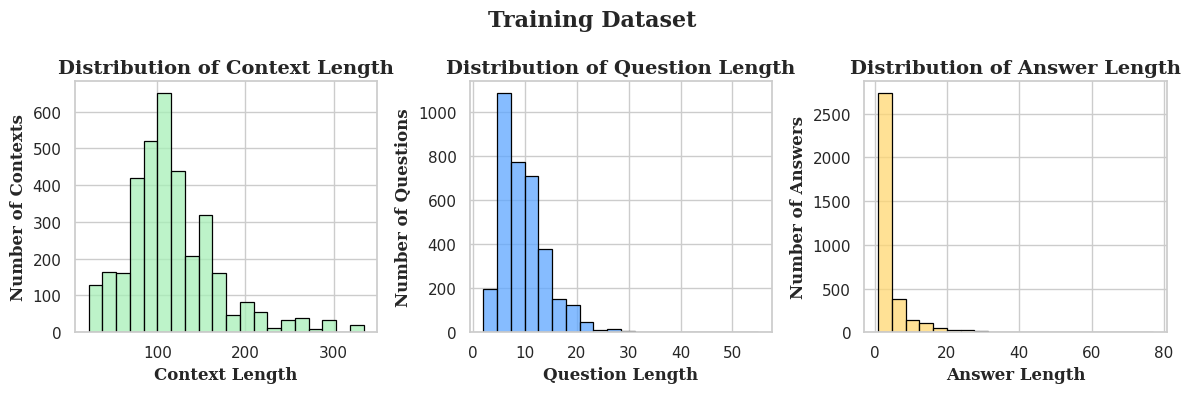

In [13]:
# Calculate the lengths of the columns
df_train['context_length'] = df_train['context'].apply(lambda x: len(str(x).split()))
df_train['question_length'] = df_train['question'].apply(lambda x: len(str(x).split()))
df_train['answer_length'] = df_train['answer_text'].apply(lambda x: len(str(x).split()))

# Set the aesthetic style and font settings
sns.set(style="whitegrid")
font_label = {'fontfamily': 'serif', 'fontsize': 12, 'fontweight': 'bold'}
font_title = {'fontfamily': 'serif', 'fontsize': 14, 'fontweight': 'bold'}

# Create subplots
fig, axes = plt.subplots(1, 3, figsize=(12, 4))  # 1 row, 3 columns

# Plot 1: Distribution of Context Length
sns.histplot(data=df_train, x='context_length', bins=20,  edgecolor='black', color='#a7efb7', ax=axes[0])
axes[0].set_title('Distribution of Context Length', fontdict=font_title)
axes[0].set_xlabel('Context Length', fontdict=font_label)
axes[0].set_ylabel('Number of Contexts', fontdict=font_label)

# Plot 2: Distribution of Question Length
sns.histplot(data=df_train, x='question_length', bins=20,  edgecolor='black', color='#5ea6ff', ax=axes[1])
axes[1].set_title('Distribution of Question Length', fontdict=font_title)
axes[1].set_xlabel('Question Length', fontdict=font_label)
axes[1].set_ylabel('Number of Questions', fontdict=font_label)

# Plot 3: Distribution of Answer Length
sns.histplot(data=df_train, x='answer_length', bins=20,  edgecolor='black', color='#ffd772', ax=axes[2])
axes[2].set_title('Distribution of Answer Length', fontdict=font_title)
axes[2].set_xlabel('Answer Length', fontdict=font_label)
axes[2].set_ylabel('Number of Answers', fontdict=font_label)

# Set a title for the set of subplots
plt.suptitle('Training Dataset', fontfamily='serif',fontsize=16, fontweight='bold')
plt.tight_layout()
plt.show()

# **Count of unique words for context, question, and answer_text in Train Dataset**

In [14]:
# Tokenize 'context', 'question', and 'answer_text' columns to count unique words
context_words = ' '.join(df_train['context']).split()
question_words = ' '.join(df_train['question']).split()
answer_text_words = ' '.join(df_train['answer_text']).split()

# Calculate unique words
unique_context_words = len(set(context_words))
unique_question_words = len(set(question_words))
unique_answer_text_words = len(set(answer_text_words))

# Display the count of unique words
print(f"Number of unique words in 'passage': {unique_context_words}")
print(f"Number of unique words in 'question': {unique_question_words}")
print(f"Number of unique words in 'answer_text': {unique_answer_text_words}")

Number of unique words in 'passage': 10877
Number of unique words in 'question': 6994
Number of unique words in 'answer_text': 4650


In [15]:
df_test.head()

,context,question,answer_text
0,To distinguish official campaigning from indep...,What could be said in a political advertisemen...,disclaimer
1,To distinguish official campaigning from indep...,Candidate's names are included in which type o...,Advertisements produced by political campaigns
2,To distinguish official campaigning from indep...,Organization's names are included in which typ...,Advertisements produced by independent organiz...
3,At the official counting of the electoral vote...,Who supported the motion the most?,Democrats
4,At the official counting of the electoral vote...,Where did support for the motion come from?,Democrats


# **Checking NaN values in test dataset**

In [16]:
# Check for NaN values in df_test
nan_count = df_test.isna().sum()

# Display columns with NaN values and their respective counts
print("Columns with NaN values:")
print(nan_count[nan_count > 0])


Columns with NaN values:
Series([], dtype: int64)


# **Visualization of Passage, Question, and Answer Length of Testing Dataset**

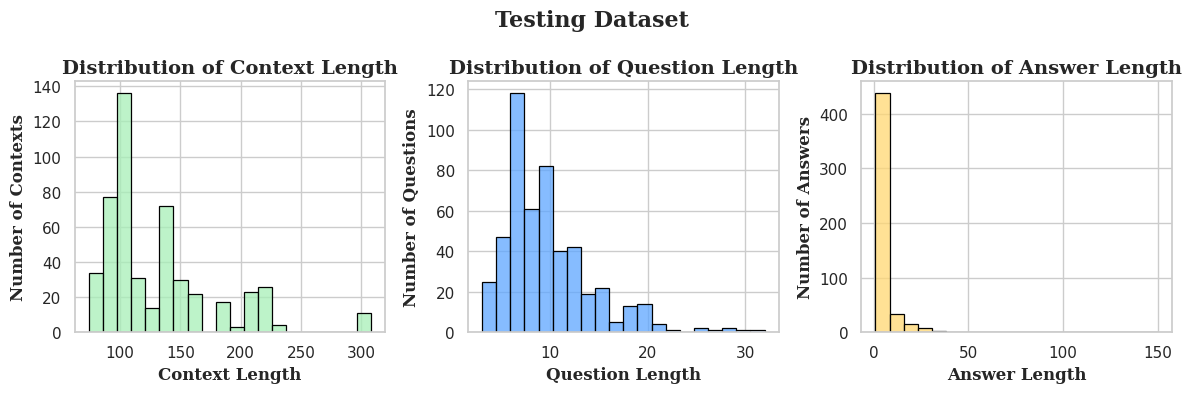

In [18]:
# Calculate the lengths of the columns
df_test['context_length'] = df_test['context'].apply(lambda x: len(str(x).split()))
df_test['question_length'] = df_test['question'].apply(lambda x: len(str(x).split()))
df_test['answer_length'] = df_test['answer_text'].apply(lambda x: len(str(x).split()))

# Set the aesthetic style and font settings
sns.set(style="whitegrid")
font_label = {'fontfamily': 'serif', 'fontsize': 12, 'fontweight': 'bold'}
font_title = {'fontfamily': 'serif', 'fontsize': 14, 'fontweight': 'bold'}

# Create subplots
fig, axes = plt.subplots(1, 3, figsize=(12, 4))  # 1 row, 3 columns

# Plot 1: Distribution of Passage Length
sns.histplot(data=df_test, x='context_length', bins=20,  edgecolor='black', color='#a7efb7', ax=axes[0])
axes[0].set_title('Distribution of Context Length', fontdict=font_title)
axes[0].set_xlabel('Context Length', fontdict=font_label)
axes[0].set_ylabel('Number of Contexts', fontdict=font_label)

# Plot 2: Distribution of Question Length
sns.histplot(data=df_test, x='question_length', bins=20,  edgecolor='black', color='#5ea6ff', ax=axes[1])
axes[1].set_title('Distribution of Question Length', fontdict=font_title)
axes[1].set_xlabel('Question Length', fontdict=font_label)
axes[1].set_ylabel('Number of Questions', fontdict=font_label)

# Plot 3: Distribution of Answer Length
sns.histplot(data=df_test, x='answer_length', bins=20,  edgecolor='black', color='#ffd772', ax=axes[2])
axes[2].set_title('Distribution of Answer Length', fontdict=font_title)
axes[2].set_xlabel('Answer Length', fontdict=font_label)
axes[2].set_ylabel('Number of Answers', fontdict=font_label)

# Set a title for the set of subplots
plt.suptitle('Testing Dataset', fontfamily='serif',fontsize=16, fontweight='bold')
plt.tight_layout()
plt.show()

# **Count of unique words for passage, question and answer_text in Test Dataset**

In [19]:
# Tokenize 'context', 'question', and 'answer_text' columns to count unique words
context_words = ' '.join(df_test['context']).split()
question_words = ' '.join(df_test['question']).split()
answer_text_words = ' '.join(df_test['answer_text']).split()

# Calculate unique words
unique_context_words = len(set(context_words))
unique_question_words = len(set(question_words))
unique_answer_text_words = len(set(answer_text_words))

# Display the count of unique words
print(f"Number of unique words in 'passage': {unique_context_words}")
print(f"Number of unique words in 'question': {unique_question_words}")
print(f"Number of unique words in 'answer_text': {unique_answer_text_words}")

Number of unique words in 'passage': 2584
Number of unique words in 'question': 1524
Number of unique words in 'answer_text': 1042


In [20]:
df_validation.head()

,context,question,answer_text
0,The Chalukya Empire (Kannada: ಚಾಲುಕ್ಯರು [tʃaːɭ...,What is the equivalent name of empire?,dynasty
1,The Chalukya Empire (Kannada: ಚಾಲುಕ್ಯರು [tʃaːɭ...,When did the Chalukya dynasty last rule India?,1190
2,The Chalukya Empire (Kannada: ಚಾಲುಕ್ಯರು [tʃaːɭ...,__ occupies 19% of India's area,South India
3,The Chalukya Empire (Kannada: ಚಾಲುಕ್ಯರು [tʃaːɭ...,When did Kannada start?,middle of the 6th century
4,The Chalukya Empire (Kannada: ಚಾಲುಕ್ಯರು [tʃaːɭ...,__ is bounded by the Bay of Bengal in the east,South India


# **Checking NaN values in validation dataset**

In [21]:
# Check for NaN values in df_train
nan_count = df_validation.isna().sum()

# Display columns with NaN values and their respective counts
print("Columns with NaN values:")
print(nan_count[nan_count > 0])


Columns with NaN values:
Series([], dtype: int64)


# **Visualization of Passage, Question, and Answer Length of Validation Dataset**

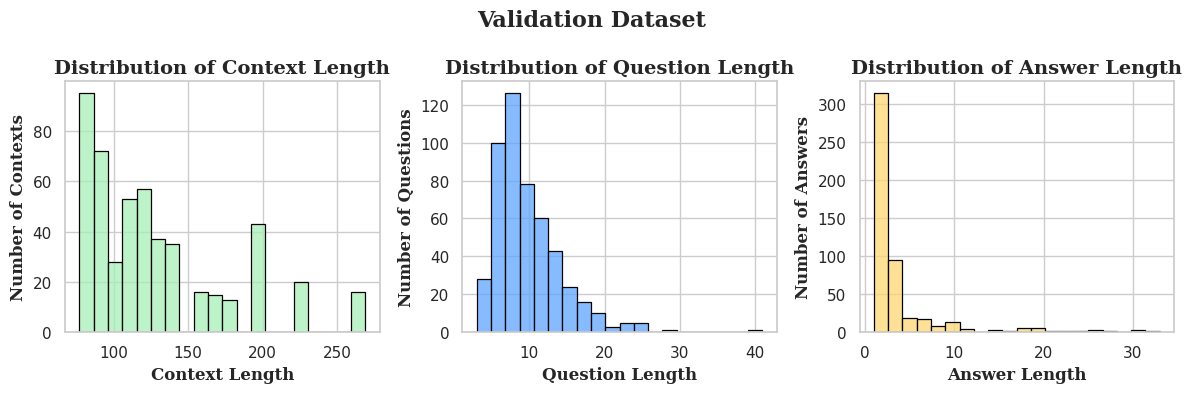

In [22]:
# Calculate the lengths of the columns
df_validation['context_length'] = df_validation['context'].apply(lambda x: len(str(x).split()))
df_validation['question_length'] = df_validation['question'].apply(lambda x: len(str(x).split()))
df_validation['answer_length'] = df_validation['answer_text'].apply(lambda x: len(str(x).split()))

# Set the aesthetic style and font settings
sns.set(style="whitegrid")
font_label = {'fontfamily': 'serif', 'fontsize': 12, 'fontweight': 'bold'}
font_title = {'fontfamily': 'serif', 'fontsize': 14, 'fontweight': 'bold'}

# Create subplots
fig, axes = plt.subplots(1, 3, figsize=(12, 4))  # 1 row, 3 columns

# Plot 1: Distribution of Passage Length
sns.histplot(data=df_validation, x='context_length', bins=20, edgecolor='black', color='#a7efb7', ax=axes[0])
axes[0].set_title('Distribution of Context Length', fontdict=font_title)
axes[0].set_xlabel('Context Length', fontdict=font_label)
axes[0].set_ylabel('Number of Contexts', fontdict=font_label)

# Plot 2: Distribution of Question Length
sns.histplot(data=df_validation, x='question_length', bins=20, edgecolor='black', color='#5ea6ff', ax=axes[1])
axes[1].set_title('Distribution of Question Length', fontdict=font_title)
axes[1].set_xlabel('Question Length', fontdict=font_label)
axes[1].set_ylabel('Number of Questions', fontdict=font_label)

# Plot 3: Distribution of Answer Length
sns.histplot(data=df_validation, x='answer_length', bins=20, edgecolor='black', color='#ffd772', ax=axes[2])
axes[2].set_title('Distribution of Answer Length', fontdict=font_title)
axes[2].set_xlabel('Answer Length', fontdict=font_label)
axes[2].set_ylabel('Number of Answers', fontdict=font_label)

# Set a title for the set of subplots
plt.suptitle('Validation Dataset', fontfamily='serif',fontsize=16, fontweight='bold')
plt.tight_layout()
plt.show()

# **Count of unique words for passage, question and answer_text in Validation Dataset**

In [23]:
# Tokenize 'context', 'question', and 'answer_text' columns to count unique words
context_words = ' '.join(df_validation['context']).split()
question_words = ' '.join(df_validation['question']).split()
answer_text_words = ' '.join(df_validation['answer_text']).split()

# Calculate unique words
unique_context_words = len(set(context_words))
unique_question_words = len(set(question_words))
unique_answer_text_words = len(set(answer_text_words))

# Display the count of unique words
print(f"Number of unique words in 'passage': {unique_context_words}")
print(f"Number of unique words in 'question': {unique_question_words}")
print(f"Number of unique words in 'answer_text': {unique_answer_text_words}")

Number of unique words in 'passage': 2326
Number of unique words in 'question': 1587
Number of unique words in 'answer_text': 881


# **Checking length of the datasets**

In [24]:
print("Train Dataset Length: ",len(df_train))
print("Test Dataset Length: ",len(df_test))
print("Validation Dataset Length: ",len(df_validation))

Train Dataset Length:  3500
Test Dataset Length:  500
Validation Dataset Length:  500


# **Installing Necesary Libraries**

In [ ]:
!pip install transformers[sentencepiece]

In [ ]:
!pip install --upgrade pip

In [ ]:
!pip install torch

In [ ]:
!pip install accelerate -U

  Using cached accelerate-0.24.1-py3-none-any.whl.metadata (18 kB)
Using cached accelerate-0.24.1-py3-none-any.whl (261 kB)
  Attempting uninstall: accelerate
    Found existing installation: accelerate 0.20.3
    Uninstalling accelerate-0.20.3:
      Successfully uninstalled accelerate-0.20.3


In [ ]:
!transformers-cli cache clear

2023-11-15 09:00:13.965735: E tensorflow/compiler/xla/stream_executor/cuda/cuda_dnn.cc:9342] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
2023-11-15 09:00:13.965790: E tensorflow/compiler/xla/stream_executor/cuda/cuda_fft.cc:609] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
2023-11-15 09:00:13.965826: E tensorflow/compiler/xla/stream_executor/cuda/cuda_blas.cc:1518] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
2023-11-15 09:00:15.182480: W tensorflow/compiler/tf2tensorrt/utils/py_utils.cc:38] TF-TRT Warning: Could not find TensorRT
usage: transformers-cli <command> [<args>]
Transformers CLI tool: error: argument {convert,download,env,run,serve,login,whoami,logout,repo,add-new-model,add-new-model-like,lfs-enable-largefiles,lfs-multipart-upload,pt-to-tf}: invalid choi

In [ ]:
!pip install transformers==4.10.3

  Using cached transformers-4.10.3-py3-none-any.whl (2.8 MB)
  Using cached sacremoses-0.1.1-py3-none-any.whl.metadata (8.3 kB)
  Using cached tokenizers-0.10.3.tar.gz (212 kB)
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Preparing metadata (pyproject.toml) ... done
Using cached sacremoses-0.1.1-py3-none-any.whl (897 kB)
  error: subprocess-exited-with-error
  
  × Building wheel for tokenizers (pyproject.toml) did not run successfully.
  │ exit code: 1
  ╰─> See above for output.
  
  note: This error originates from a subprocess, and is likely not a problem with pip.
  ERROR: Failed building wheel for tokenizers
Failed to build tokenizers
ERROR: Could not build wheels for tokenizers, which is required to install pyproject.toml-based projects


In [ ]:
!pip install accelerate==0.20.3

  Using cached accelerate-0.20.3-py3-none-any.whl.metadata (17 kB)
Using cached accelerate-0.20.3-py3-none-any.whl (227 kB)
  Attempting uninstall: accelerate
    Found existing installation: accelerate 0.24.1
    Uninstalling accelerate-0.24.1:
      Successfully uninstalled accelerate-0.24.1


In [ ]:
!pip install transformers[torch]

In [ ]:
!pip install sentencepiece

In [ ]:
!pip install --upgrade transformers

# **T5 Model and Its Tokenizer**

In [ ]:
from transformers import T5Tokenizer, T5ForConditionalGeneration
#https://huggingface.co/docs/transformers/model_doc/t5
tokenizer = T5Tokenizer.from_pretrained("t5-small")
model = T5ForConditionalGeneration.from_pretrained("t5-small")

Special tokens have been added in the vocabulary, make sure the associated word embeddings are fine-tuned or trained.


# **Custom dataset class**

In [ ]:
from torch.utils.data import Dataset, DataLoader

class EnglishQADataset(Dataset):
    def __init__(self, data, tokenizer, max_length=520):
        self.data = data
        self.tokenizer = tokenizer
        self.max_length = max_length

    def __len__(self):
        return len(self.data)

    def __getitem__(self, idx):
        context = self.data.iloc[idx]['context']
        question = self.data.iloc[idx]['question']
        answer = self.data.iloc[idx]['answer_text']

        # Tokenize context and question separately
        inputs = self.tokenizer(
            context,
            question,
            max_length=self.max_length,
            padding='max_length',
            truncation=True,
            return_tensors='pt'
        )

        # Tokenize answer
        tokenized_answer = self.tokenizer(
            answer,
            max_length=self.max_length,
            padding='max_length',
            truncation=True,
            return_tensors='pt'
        )

        # Process tokenized answer labels
        labels = tokenized_answer['input_ids'].squeeze()
        attention_mask_labels = tokenized_answer['attention_mask'].squeeze()

        # Ignore padded tokens during training
        labels[attention_mask_labels == 0] = -100

        # Handle cases where the input sequence is longer than max_length
        if inputs['input_ids'].shape[1] > self.max_length:
            inputs['input_ids'] = inputs['input_ids'][:, :self.max_length]
            inputs['attention_mask'] = inputs['attention_mask'][:, :self.max_length]
            attention_mask_labels = attention_mask_labels[:self.max_length]

        # Ensuring labels and attention_mask_labels have the same length
        labels = labels[:self.max_length]

        # Using .squeeze() on labels
        labels = labels.squeeze()

        # Return as dictionaries
        return {
            'input_ids': inputs['input_ids'].squeeze(),
            'attention_mask': inputs['attention_mask'].squeeze(),
            'labels': labels,

        }


In [ ]:
train_dataset = EnglishQADataset(df_train, tokenizer)
validation_dataset = EnglishQADataset(df_validation, tokenizer)
test_dataset = EnglishQADataset(df_test, tokenizer)

train_dataloader = DataLoader(train_dataset , batch_size=10, shuffle=True)
validation_dataloader = DataLoader(validation_dataset , batch_size=10, shuffle=False)
test_dataloader = DataLoader(test_dataset , batch_size=10, shuffle=False)

In [ ]:
import torch
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
model.to(device)

T5ForConditionalGeneration(
  (shared): Embedding(32128, 512)
  (encoder): T5Stack(
    (embed_tokens): Embedding(32128, 512)
    (block): ModuleList(
      (0): T5Block(
        (layer): ModuleList(
          (0): T5LayerSelfAttention(
            (SelfAttention): T5Attention(
              (q): Linear(in_features=512, out_features=512, bias=False)
              (k): Linear(in_features=512, out_features=512, bias=False)
              (v): Linear(in_features=512, out_features=512, bias=False)
              (o): Linear(in_features=512, out_features=512, bias=False)
              (relative_attention_bias): Embedding(32, 8)
            )
            (layer_norm): T5LayerNorm()
            (dropout): Dropout(p=0.1, inplace=False)
          )
          (1): T5LayerFF(
            (DenseReluDense): T5DenseActDense(
              (wi): Linear(in_features=512, out_features=2048, bias=False)
              (wo): Linear(in_features=2048, out_features=512, bias=False)
              (dropout): Drop

# **Train Dataset Encoding Printing: passage, question, answer(input_ids,attention_mask)**

In [ ]:
# Set a flag to track whether it's the first batch
first_batch = True

for batch in train_dataloader:
    # Move inputs and labels to the GPU
    inputs = {key: value.to(device) for key, value in batch.items()}  # Using 'batch' directly

    # Extract information for the first example in the batch
    input_ids = inputs['input_ids'][0]
    attention_mask = inputs['attention_mask'][0]
    labels = inputs['labels'][0]


    # Print information
    print("Input IDs:", input_ids)
    print("Attention Mask:", attention_mask)
    print("Labels:", labels)


    # Break out of the loop after processing the first batch
    break


Input IDs: tensor([   86,   932, 15830,     6,     8,   837,  6709,  1247,  2166,    16,
        30441,    45,     8,   907,  6524,     6,    68,  2390,  5923,  3271,
        27484,  2345,  1092,    47,  7513, 28963,    12,     3,  6004,    15,
          221,    12,     8,   797,  1690,   406,   652,   424,    16,  1205,
            5,    86,  1600, 15830,     6,    38,   294,    13,     8,   374,
         6626,    63,   277,    21,  8430,     7,  7139,     6,     8,  1270,
         7020,     8,   837,  1247,  2166,    16, 30441,     5, 30441,    11,
          368, 19732,    40,   232,   130,    59,  5330,  1285,    16,     8,
         2791,     6,    68,   321,   130,   974,    12,    34,     6,    28,
          150,   615,  1037,  1204,    57,     8,  1270,    16,  2509,     5,
          555,    13,     8,  1353,    13,     8,  2791,    47,    24,     8,
          799,  1846,     8,   837,  6788,  1192,   133,    36,   261, 22801,
           57,     8,   837,    11,     8,  1270,    

# **Test Dataset Encoding: passage, question, answer(input_ids,attention_mask)**

In [ ]:
# Set a flag to track whether it's the first batch
first_batch = True

for batch in test_dataloader:
    # Move inputs and labels to the GPU
    inputs = {key: value.to(device) for key, value in batch.items()}  # Using 'batch' directly

    # Extract information for the first example in the batch
    input_ids = inputs['input_ids'][0]
    attention_mask = inputs['attention_mask'][0]
    labels = inputs['labels'][0]


    # Print information
    print("Input IDs:", input_ids)
    print("Attention Mask:", attention_mask)
    print("Labels:", labels)


    # Break out of the loop after processing the first batch
    break


Input IDs: tensor([  304, 15849,  2314,  2066,    53,    45,  2547,  2066,    53,     6,
         1827, 20356,    30,  4390,   130,   831,    12,   560,     3,     9,
         7375,   138,  1028, 15085,    49,     3,  9690,     8,  1470,  1966,
           21,     8, 21592,     5, 29555,  4128,  2546,    57,  1827,  8203,
         1086,  1285,     8,  2493,     6,    96,   196,    31,    51,   784,
         1608, 12416,   342,    31,     7,   564, 13679,    11,    27, 15444,
           48,  1569,   535, 29555,  4128,  2546,    57,  2547,  2371,  1086,
         1285,     8,  2493,     6,    96,  6306, 14878,   257,   564,   908,
           19,  1966,    21,     8,   738,    13,    48, 21592,  1686,    11,
           45,  1600,   220,    41,  3328,   477,   274,     8,   879,  4356,
          201,   224,  2371,    31,  6543,   130, 18022,    45,     3, 27492,
          136,  4775,    57,   564,     5,     3, 22769,     6,  4390, 20356,
          163,   831,     3,     9,  1545,    96, 127

# **Validation Dataset Encoding: passage, question, answer(input_ids,attention_mask)**

In [ ]:
# Set a flag to track whether it's the first batch
first_batch = True

for batch in validation_dataloader:
    # Move inputs and labels to the GPU
    inputs = {key: value.to(device) for key, value in batch.items()}  # Using 'batch' directly

    # Extract information for the first example in the batch
    input_ids = inputs['input_ids'][0]
    attention_mask = inputs['attention_mask'][0]
    labels = inputs['labels'][0]


    # Print information
    print("Input IDs:", input_ids)
    print("Attention Mask:", attention_mask)
    print("Labels:", labels)


    # Break out of the loop after processing the first batch
    break


Input IDs: tensor([   37, 20732,  1598,    63,     9, 12187,    41,   439,   152, 18089,
           10,     3,     2,   784,    17,     2,     9,     2,  1598,   354,
            2,   908,    61,    47,    46,  2557, 11268,     3, 24805,     7,
           17,    63,    24,     3, 16718,   508,  1467,    13,  7518,    11,
         2069,  1547,   344,     8,   431,   189,    11,     8,   586,   189,
        11653,     5,     3,  2092,    48,  1059,     6,    79,     3, 16718,
           38,   386,  1341,   780,   928,     3, 24805,     7,  3010,     5,
           37,     3, 16454,     3, 24805,     7,    17,    63,     6,   801,
           38,     8,    96,   279,     9,    26,  3690, 20732,  1598,    63,
            9,     7,  1686,     3, 16718,    45,  2964,  8873,    23,    41,
        18306,  3862,  3690,    61,    45,     8,  2214,    13,     8,   431,
          189,  2646,     5,    37,  3862,  3690, 20732,  1598,    63,     9,
            7,  1553,    12, 15376,    70, 12315,    

# **Train Dataset Decoding: passage, question, and answer**
* converting the tensor values to human-readable tokens

In [ ]:
# Set a flag to track whether it's the first batch
first_batch = True

for batch in train_dataloader:
    # Move inputs and labels to the GPU
    inputs = {key: value.to(device) for key, value in batch.items()}

    # Extract information for the first example in the batch
    input_ids = inputs['input_ids'][0]
    attention_mask = inputs['attention_mask'][0]
    labels = inputs['labels'][0]


    # Check for problematic token IDs causing overflow error during decoding
    problematic_ids = torch.nonzero((input_ids < 0) | (input_ids >= tokenizer.vocab_size))
    if problematic_ids.numel() > 0:
        print("Problematic Token IDs:", input_ids[problematic_ids])
        print("Problematic Token Positions:", problematic_ids)
        # Handle the problematic input IDs as needed
        raise ValueError("Problematic token IDs detected")

    # Decode and print input text
    decoded_input_text = tokenizer.decode(input_ids.clamp(0, tokenizer.vocab_size - 1), skip_special_tokens=True)
    print("Decoded Input Text:", decoded_input_text)
    print("Attention Mask:", attention_mask)

    # Decode and print labels
    decoded_labels = tokenizer.decode(labels.clamp(0, tokenizer.vocab_size - 1), skip_special_tokens=True)
    print("Labels:", decoded_labels)



    # Break out of the loop after processing the first batch
    break


Decoded Input Text: The Crimean War marked the ascendancy of France to the position of pre-eminent power on the Continent,:411 the continued decline of the Ottoman Empire, and the beginning of a decline for Tsarist Russia. As Fuller notes, "Russia had been beaten on the Crimean peninsula, and the military feared that it would inevitably be beaten again unless steps were taken to surmount its military weakness." The Crimean War marks the demise of the Concert of Europe, the balance of power that had dominated Europe since the Congress of Vienna in 1815, and which had included France, Russia, Austria and the United Kingdom. Which came later, the Congress of Vienna or the Crimean War?
Attention Mask: tensor([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
        1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
        1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
        1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 

# **Test Dataset Decoding: passage, question, and answer**
* converting the tensor values to human-readable tokens

In [ ]:
# Set a flag to track whether it's the first batch
first_batch = True

for batch in test_dataloader:
    # Move inputs and labels to the GPU
    inputs = {key: value.to(device) for key, value in batch.items()}

    # Extract information for the first example in the batch
    input_ids = inputs['input_ids'][0]
    attention_mask = inputs['attention_mask'][0]
    labels = inputs['labels'][0]


    # Check for problematic token IDs causing overflow error during decoding
    problematic_ids = torch.nonzero((input_ids < 0) | (input_ids >= tokenizer.vocab_size))
    if problematic_ids.numel() > 0:
        print("Problematic Token IDs:", input_ids[problematic_ids])
        print("Problematic Token Positions:", problematic_ids)
        # Handle the problematic input IDs as needed
        raise ValueError("Problematic token IDs detected")

    # Decode and print input text
    decoded_input_text = tokenizer.decode(input_ids.clamp(0, tokenizer.vocab_size - 1), skip_special_tokens=True)
    print("Decoded Input Text:", decoded_input_text)
    print("Attention Mask:", attention_mask)

    # Decode and print labels
    decoded_labels = tokenizer.decode(labels.clamp(0, tokenizer.vocab_size - 1), skip_special_tokens=True)
    print("Labels:", decoded_labels)


    # Break out of the loop after processing the first batch
    break


Decoded Input Text: To distinguish official campaigning from independent campaigning, political advertisements on television were required to include a verbal disclaimer identifying the organization responsible for the advertisement. Advertisements produced by political campaigns usually included the statement, "I'm [candidate's name], and I approve this message." Advertisements produced by independent organizations usually included the statement, "[Organization name] is responsible for the content of this advertisement", and from September 3 (60 days before the general election), such organizations' ads were prohibited from mentioning any candidate by name. Previously, television advertisements only required a written "paid for by" disclaimer on the screen. What could be said in a political advertisement on television?
Attention Mask: tensor([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
        1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1

# **Validation Dataset Decoding: passage, question, and answer**
* converting the tensor values to human-readable tokens

In [ ]:
# Set a flag to track whether it's the first batch
first_batch = True

for batch in validation_dataloader:
    # Move inputs and labels to the GPU
    inputs = {key: value.to(device) for key, value in batch.items()}

    # Extract information for the first example in the batch
    input_ids = inputs['input_ids'][0]
    attention_mask = inputs['attention_mask'][0]
    labels = inputs['labels'][0]


    # Check for problematic token IDs causing overflow error during decoding
    problematic_ids = torch.nonzero((input_ids < 0) | (input_ids >= tokenizer.vocab_size))
    if problematic_ids.numel() > 0:
        print("Problematic Token IDs:", input_ids[problematic_ids])
        print("Problematic Token Positions:", problematic_ids)
        # Handle the problematic input IDs as needed
        raise ValueError("Problematic token IDs detected")

    # Decode and print input text
    decoded_input_text = tokenizer.decode(input_ids.clamp(0, tokenizer.vocab_size - 1), skip_special_tokens=True)
    print("Decoded Input Text:", decoded_input_text)
    print("Attention Mask:", attention_mask)

    # Decode and print labels
    decoded_labels = tokenizer.decode(labels.clamp(0, tokenizer.vocab_size - 1), skip_special_tokens=True)
    print("Labels:", decoded_labels)



    # Break out of the loop after processing the first batch
    break


Decoded Input Text: The Chalukya Empire (Kannada:  [taukj]) was an Indian royal dynasty that ruled large parts of southern and central India between the 6th and the 12th centuries. During this period, they ruled as three related yet individual dynasties. The earliest dynasty, known as the "Badami Chalukyas", ruled from Vatapi (modern Badami) from the middle of the 6th century. The Badami Chalukyas began to assert their independence at the decline of the Kadamba kingdom of Banavasi and rapidly rose to prominence during the reign of Pulakeshin II. The rule of the Chalukyas marks an important milestone in the history of South India and a golden age in the history of Karnataka. The political atmosphere in South India shifted from smaller kingdoms to large empires with the ascendancy of Badami Chalukyas. A Southern India-based kingdom took control and consolidated the entire region between the Kaveri and the Narmada rivers. The rise of this empire saw the birth of efficient administration, 

# **Training Arguments**

In [ ]:
from transformers import TrainingArguments
from torch.optim import AdamW


# Create a custom optimizer using torch.optim.AdamW
custom_optimizer = AdamW(
    model.parameters(),
    lr=1e-3,  # Learning rate
    eps=1e-8,  # Epsilon value to prevent division by zero
    weight_decay=0.01,  # Weight decay (L2 regularization)
)

# Define the TrainingArguments for question answering
training_args = TrainingArguments(
    output_dir='/content/drive/MyDrive/QA_Dataset/T5_QA',
    num_train_epochs=3,
    per_device_train_batch_size=1,
    gradient_accumulation_steps=8,  # Accumulate gradients over 8 small batches
    evaluation_strategy="steps",
    eval_steps=500,
    save_total_limit=2,
    save_steps=500,
    learning_rate=1e-3,
    do_train=True,
    do_eval=True,
    remove_unused_columns=False,
    push_to_hub=False,
    report_to="none",
    load_best_model_at_end=True,
    lr_scheduler_type="cosine_with_restarts",  # Setting the learning rate scheduler type
    warmup_steps=100,  # Number of warmup steps
    weight_decay=0.01,  # Weight decay (L2 regularization)
    logging_dir='/content/drive/MyDrive/QA_Dataset/T5_QA',  # Using the same directory for logs
    logging_steps=500,  # Log every 500 steps
)


# **Custom Data Collator for Question Answering**
* A custom data collator for question answering is used to handle the specific data formatting required for training models on question answering tasks. It facilitates the processing of input data into a format suitable for model training by performing tasks such as padding, truncation, and organizing inputs and labels for the QA model.

In [ ]:
import torch
import torch.nn.functional as F
from transformers import DataCollatorForSeq2Seq

class CustomDataCollatorForSeq2Seq(DataCollatorForSeq2Seq):
    def __call__(self, features):
        batch = super().__call__(features)

        # Find the maximum length of labels in the batch
        max_label_length = max(feature["labels"].shape[-1] for feature in features)

        # Pad or truncate the "labels" arrays to have the same length
        batch["labels"] = torch.stack([
            F.pad(torch.as_tensor(feature["labels"]), (0, max_label_length - feature["labels"].shape[-1]), value=-100)
            for feature in features
        ])

        return batch




# Creating a data collator using the custom collator
data_collator = CustomDataCollatorForSeq2Seq(
    tokenizer=tokenizer,
    model=model,
    padding=True,
    max_length=520,
    label_pad_token_id=tokenizer.pad_token_id,
    pad_to_multiple_of=8  # Ensuring the sequence length is a multiple of 8 (adjust as needed)
)

# **Trainer**
* The trainer package provides utilities to write re-usable training scripts. The core idea is to use a trainer that implements a nested loop, where the outer loop runs the data collection steps and the inner loop the optimization steps.

In [ ]:
from transformers import Trainer
# Define the Trainer with the custom optimizer
trainer = Trainer(
    model=model,
    args=training_args,
    data_collator=data_collator,
    train_dataset=train_dataset,
    eval_dataset=validation_dataset,
    optimizers=(custom_optimizer, None),  # Passing the custom optimizer here
)


# **Training Starts Here**

In [ ]:
# Fine-tune the model
trainer.train()

/usr/local/lib/python3.10/dist-packages/transformers/tokenization_utils_base.py:2632: UserWarning: `max_length` is ignored when `padding`=`True` and there is no truncation strategy. To pad to max length, use `padding='max_length'`.
  warnings.warn(


Step,Training Loss,Validation Loss
500,1.946000,1.240803
1000,1.125800,1.124344


Be aware, overflowing tokens are not returned for the setting you have chosen, i.e. sequence pairs with the 'longest_first' truncation strategy. So the returned list will always be empty even if some tokens have been removed.
Be aware, overflowing tokens are not returned for the setting you have chosen, i.e. sequence pairs with the 'longest_first' truncation strategy. So the returned list will always be empty even if some tokens have been removed.
Be aware, overflowing tokens are not returned for the setting you have chosen, i.e. sequence pairs with the 'longest_first' truncation strategy. So the returned list will always be empty even if some tokens have been removed.
Be aware, overflowing tokens are not returned for the setting you have chosen, i.e. sequence pairs with the 'longest_first' truncation strategy. So the returned list will always be empty even if some tokens have been removed.
Be aware, overflowing tokens are not returned for the setting you have chosen, i.e. sequence pai

TrainOutput(global_step=1311, training_loss=1.3433158286739906, metrics={'train_runtime': 1120.1155, 'train_samples_per_second': 9.374, 'train_steps_per_second': 1.17, 'total_flos': 1441643951554560.0, 'train_loss': 1.3433158286739906, 'epoch': 3.0})

# **Saving model and tokenizer**

In [ ]:
# Save the model
model.save_pretrained('/content/drive/MyDrive/QA_Dataset/T5_QA/English_QA_T5_Model.pt')

# Save the tokenizer
tokenizer.save_pretrained('/content/drive/MyDrive/QA_Dataset/T5_QA/English_QA_T5_Tokenizer.json')


('/content/drive/MyDrive/QA_Dataset/T5_QA/English_QA_T5_Tokenizer.json/tokenizer_config.json',
 '/content/drive/MyDrive/QA_Dataset/T5_QA/English_QA_T5_Tokenizer.json/special_tokens_map.json',
 '/content/drive/MyDrive/QA_Dataset/T5_QA/English_QA_T5_Tokenizer.json/spiece.model',
 '/content/drive/MyDrive/QA_Dataset/T5_QA/English_QA_T5_Tokenizer.json/added_tokens.json')

# **Loading trained model and tokenizer**

In [ ]:
from transformers import T5Tokenizer, T5ForConditionalGeneration

# Load the saved model
model = T5ForConditionalGeneration.from_pretrained('/content/drive/MyDrive/QA_Dataset/T5_QA/English_QA_T5_Model.pt')

# Load the tokenizer
tokenizer = T5Tokenizer.from_pretrained('/content/drive/MyDrive/QA_Dataset/T5_QA/English_QA_T5_Tokenizer.json')

Special tokens have been added in the vocabulary, make sure the associated word embeddings are fine-tuned or trained.


# **Evaluation Metrics Installing**

In [ ]:
!pip install evaluate

In [ ]:
!pip install sacrebleu

In [ ]:
!pip install rouge_score

In [ ]:
!pip install jiwer

# **Testing the model**

In [ ]:
decoded_predictions_batch = []
decoded_references_batch = []

# Loop through the test dataset and generate predictions
for batch in test_dataloader:
    inputs = batch['input_ids'].to('cuda')  # Move inputs to the 'cuda' device
    labels = batch['labels'].to('cuda')  # Move labels to the 'cuda' device

    # Ensuring the model, inputs, and labels are on the same device
    model = model.to(inputs.device)

    # Generating answers using our model
    with torch.no_grad():
        # Generating predictions
        predictions = model.generate(inputs, max_length=520, num_beams=4, early_stopping=True)

        # Decoding generated answers
        try:
            decoded_predictions_batch.extend(tokenizer.batch_decode(predictions.cpu(), skip_special_tokens=True))
        except Exception as e:
            print("Exception occurred during decoding (predictions):", e)


        # Decoding labels for references
        try:
            # Converting labels to a list of token IDs
            labels_list = labels.cpu()
             # Decoding each label sequence
            decoded_references_batch.extend([tokenizer.decode(ids.clamp(0, tokenizer.vocab_size - 1), skip_special_tokens=True) for ids in labels_list])
        except Exception as e:
            print("Exception occurred during decoding (references):", e)



Be aware, overflowing tokens are not returned for the setting you have chosen, i.e. sequence pairs with the 'longest_first' truncation strategy. So the returned list will always be empty even if some tokens have been removed.


In [ ]:
print(decoded_predictions_batch)

['disclaimer', 'political advertisements', 'political advertisements', 'Senator Boxer', 'the Senate', 'Democrats', '31 Democrats', 'motion', 'Senate', 'Democrats', 'Queen Victoria', 'Prince Albert', 'Duke of York', 'a byword for all that is great and good', 'Prince of York', 'Prince Albert', 'Prince Albert', 'Prince Albert', 'Prince Albert', 'great-grandfather', 'a byword', 'to make it steady again', 'propagseminate', 'a rocking throne', 'the hardships of war', 'king', 'family', 'George VI', 'Labour Member of Parliament', 'after', 'wrote to his brother Edward', 'make it steady', 'a rocking throne', 'brother Edward', 'public', '1936', 'Prince Albert qualified as RAF pilot', 'Royal Air Force', 'Prince Albert qualified as an RAF pilot', 'Prince Albert qualified as an RAF pilot', 'RAF pilot', 'Royal Air Force', 'the Royal Air Force', 'Prince Albert qualified as an RAF pilot', 'took command of a squadron', 'February 1918', 'Prince Albert qualified as an RAF pilot', 'RAF', 'Prince Albert qua

In [ ]:
print(len(decoded_predictions_batch))

500


In [ ]:
print( decoded_references_batch)

['disclaimer', 'Advertisements produced by political campaigns', 'Advertisements produced by independent organizations', 'Democrats', 'Democrats', 'House of Representatives and the Senate', 'one', 'motion', '25', '52 Republicans and 80 Democrats', 'to name the new baby Albert', 'Prince of Wales', 'Duchess of Teck', 'His maternal grandmother, the Duchess of Teck, did not like the first name the baby had been given', 'Queen Victoria', 'Albert Frederick Arthur George', 'Albert Frederick Arthur George', 'Albert Frederick Arthur George', 'Albert Frederick Arthur George', 'His birthday (14 December 1895) was the 34th anniversary of the death of his great-grandfather, Prince Albert', 'Albert', 'to make it steady again', 'wrote', 'dutiful family man and by showing personal courage', 'imperial power was eroded', 'king', 'public', 'Hardie', 'Parliament', '1936', 'wrote', 'assumed "a rocking throne", and tried "to make it steady again"', 'abdication', 'rocking throne', 'low', '1936', 'Prince Albe

In [ ]:
print(len(decoded_references_batch))

500


# **Metrics Loading**

In [ ]:
from evaluate import load

# Loading the evaluation metric for Character Error Rate (CER) and Word Error Rate (WER) and Exact Match(em)
cer_metric = load("cer")
wer_metric = load("wer")
exact_match_metric = load("exact_match")

# Loading BLEU and METEOR metrics
bleu_metric = load("bleu")
meteor = load('meteor')

# Calculating Character Error Rate (CER), Word Error Rate (WER) and Exact Match (EM)
results_CER = cer_metric.compute(predictions=decoded_predictions_batch, references=decoded_references_batch)
results_WER = wer_metric.compute(predictions=decoded_predictions_batch, references=decoded_references_batch)
results_em = exact_match_metric.compute(predictions=decoded_predictions_batch, references=decoded_references_batch)

# Calculating Bilingual Evaluation Understudy (BLEU) , Recall-Oriented Understudy for Gisting Evaluation (ROUGE) and METEOR(M)
results_bleu = bleu_metric.compute(predictions=decoded_predictions_batch, references=decoded_references_batch)
results_met = meteor.compute(predictions=decoded_predictions_batch, references=decoded_references_batch)

[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package omw-1.4 to /root/nltk_data...
[nltk_data]   Package omw-1.4 is already up-to-date!


In [ ]:
print("Character Error Rate for Bangla QA:", results_CER)
print("Word Error Rate for Bangla QA:",results_WER)
print("Exact Match for Bangla QA:",results_em)
print("BLEU Score for Bangla QA:",results_bleu)
print("METEOR for Bangla QA:",results_met)

Character Error Rate for Bangla QA: 0.8532340040381536
Word Error Rate for Bangla QA: 0.9374732334047109
Exact Match for Bangla QA: {'exact_match': 0.132}
BLEU Score for Bangla QA: {'bleu': 0.09835037932472389, 'precisions': [0.3191489361702128, 0.2562326869806094, 0.26218097447795824, 0.27697841726618705], 'brevity_penalty': 0.3542886835746818, 'length_ratio': 0.4907630522088353, 'translation_length': 1222, 'reference_length': 2490}
METEOR for Bangla QA: {'meteor': 0.16601501109287561}


In [ ]:
from rouge_score import rouge_scorer


# Initialize the Rouge scorer
scorer = rouge_scorer.RougeScorer(['rouge1', 'rouge2', 'rougeL'], use_stemmer=False)

# Preprocess the text
def preprocess_text(text):
    tokens = text.split()
    return ' '.join(tokens)

# Calculate scores for each pair of predictions and references
rouge1_f1_scores = []
rouge1_precision_scores = []
rouge1_recall_scores = []
rouge2_f1_scores = []
rouge2_precision_scores = []
rouge2_recall_scores = []
rougeL_f1_scores = []
rougeL_precision_scores = []
rougeL_recall_scores = []

for ref, pred in zip(decoded_references_batch, decoded_predictions_batch):
    candidate_summary = preprocess_text(pred)
    reference_summary = preprocess_text(' '.join(ref))
    scores = scorer.score(reference_summary, candidate_summary)

    rouge1_f1_scores.append(scores['rouge1'].fmeasure)
    rouge1_precision_scores.append(scores['rouge1'].precision)
    rouge1_recall_scores.append(scores['rouge1'].recall)
    rouge2_f1_scores.append(scores['rouge2'].fmeasure)
    rouge2_precision_scores.append(scores['rouge2'].precision)
    rouge2_recall_scores.append(scores['rouge2'].recall)
    rougeL_f1_scores.append(scores['rougeL'].fmeasure)
    rougeL_precision_scores.append(scores['rougeL'].precision)
    rougeL_recall_scores.append(scores['rougeL'].recall)

# Calculate the average scores
avg_rouge1_f1 = sum(rouge1_f1_scores) / len(rouge1_f1_scores)
avg_rouge1_precision = sum(rouge1_precision_scores) / len(rouge1_precision_scores)
avg_rouge1_recall = sum(rouge1_recall_scores) / len(rouge1_recall_scores)
avg_rouge2_f1 = sum(rouge2_f1_scores) / len(rouge2_f1_scores)
avg_rouge2_precision = sum(rouge2_precision_scores) / len(rouge2_precision_scores)
avg_rouge2_recall = sum(rouge2_recall_scores) / len(rouge2_recall_scores)
avg_rougeL_f1 = sum(rougeL_f1_scores) / len(rougeL_f1_scores)
avg_rougeL_precision = sum(rougeL_precision_scores) / len(rougeL_precision_scores)
avg_rougeL_recall = sum(rougeL_recall_scores) / len(rougeL_recall_scores)

# Print the average scores
print("Average Rouge-1 F1 Score:", avg_rouge1_f1)
print("Average Rouge-1 Precision:", avg_rouge1_precision)
print("Average Rouge-1 Recall:", avg_rouge1_recall)

print("Average Rouge-2 F1 Score:", avg_rouge2_f1)
print("Average Rouge-2 Precision:", avg_rouge2_precision)
print("Average Rouge-2 Recall:", avg_rouge2_recall)

print("Average Rouge-L F1 Score:", avg_rougeL_f1)
print("Average Rouge-L Precision:", avg_rougeL_precision)
print("Average Rouge-L Recall:", avg_rougeL_recall)


Average Rouge-1 F1 Score: 0.00690842100780777
Average Rouge-1 Precision: 0.02074226226989385
Average Rouge-1 Recall: 0.00565758322119721
Average Rouge-2 F1 Score: 0.0004327272727272727
Average Rouge-2 Precision: 0.0027857142857142855
Average Rouge-2 Recall: 0.00025634920634920634
Average Rouge-L F1 Score: 0.00690842100780777
Average Rouge-L Precision: 0.02074226226989385
Average Rouge-L Recall: 0.00565758322119721


# **Create csv file for storing context, question, answers, and generated answer**

In [ ]:

# Create a DataFrame to store answers
generated_answer_df = pd.DataFrame({
    'Context': df_test['context'],  # Assuming 'test_data' contains our test dataset
    'Question': df_test['question'],  # Assuming 'test_data' contains our test dataset
    'Reference_Answer': decoded_references_batch,
    'Generated_Answer': decoded_predictions_batch
})

# Save generated answers to a CSV file
generated_answer_df.to_csv("/content/drive/MyDrive/QA_Dataset/T5_QA/T5_generated_answers.csv", index=False)
